In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

# LOAD DATASET

In [5]:
df = pd.read_excel("slr06.xls")
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [7]:
raw_X = df["X"].values.reshape(-1, 1)
y = df["Y"].values

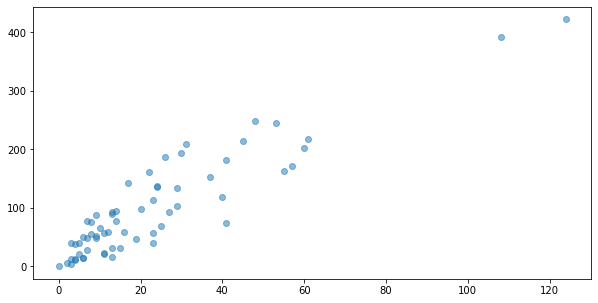

In [10]:
plt.figure(figsize=(10,5))
plt.plot(raw_X,y, 'o', alpha=0.5)

In [11]:
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]], dtype=int64),
 array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [12]:
np.ones((len(raw_X),1))[:3]


array([[1.],
       [1.],
       [1.]])

In [16]:
X = np.concatenate((np.ones((len(raw_X),1)),raw_X),axis=1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [28]:
w = np.random.normal((2,1)) 
# w = np.array([5,3])
w

array([1.78375415, 1.80939281])

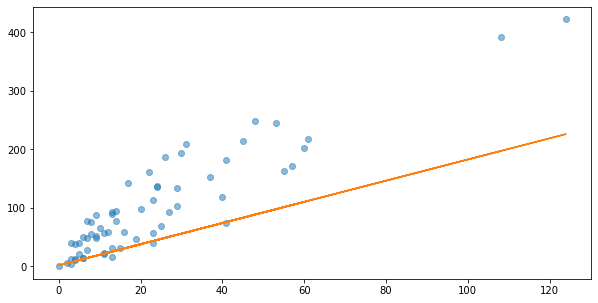

In [30]:
plt.figure(figsize=(10,5))
y_predict = np.dot(X, w)
plt.plot(raw_X,y,"o", alpha=0.5)
plt.plot(raw_X,y_predict)

# HYPOTHESIS AND COST FUNCTION

In [31]:
def hypothesis_function(X, theta):
    return X.dot(theta)

In [32]:
h = hypothesis_function(X, w)

In [33]:
def cost_function(h, y):
    return (1/(2*len(y))) * np.sum((h-y)**2)

In [34]:
h = hypothesis_function(X, w)
cost_function(h, y)

2826.394208096598

# GRADIENT DESCENT

In [41]:

def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])
        
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

# DO Linear regression with GD

In [42]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

theta: [19.87869328  3.41632379]
cost: 625.3743546598573


In [43]:
theta_list[:10]

[[1.7837541472689291, 1.8093928117634477],
 [1.8387139831633323, 3.929264716178925],
 [1.9276204586454018, 3.8039300269129876],
 [2.018728741544383, 3.8019627830246385],
 [2.1093775800918007, 3.800005459629497],
 [2.1995692911912914, 3.7980580067000203],
 [2.2893061800627232, 3.796120374461044],
 [2.3785905403011136, 3.7941925133884125],
 [2.46742465393525, 3.7922743742077127],
 [2.5558107914860173, 3.7903659078930145]]

In [44]:
theta_list = np.array(theta_list)

In [45]:
cost_list[:5]

[2826.394208096598,
 716.8198876906667,
 707.8988423838493,
 707.0685915772419,
 706.2466932985456]

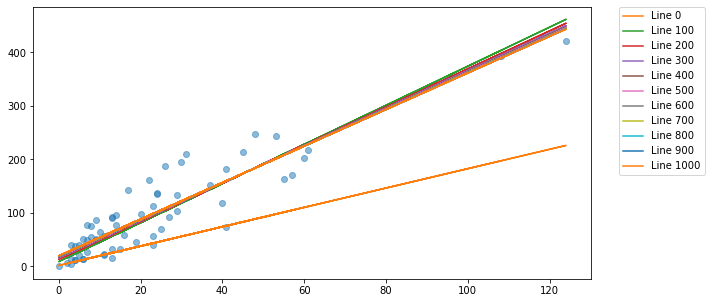

In [48]:
plt.figure(figsize=(10,5))

y_predict_step= np.dot(X, theta_list.transpose())

y_predict_step
plt.plot(raw_X,y,"o", alpha=0.5)
for i in range (0,len(cost_list),100):
    plt.plot(raw_X,y_predict_step[:,i], label='Line %d'%i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

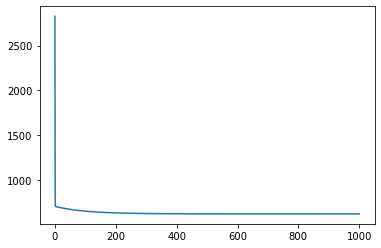

In [54]:
plt.plot(range(len(cost_list)), cost_list);

In [55]:
th0 = theta_list[:,0]
th1 = theta_list[:,1]
TH0, TH1 = np.meshgrid(th0, th1)

In [56]:
Js = np.array([cost_function(y, hypothesis_function(X, [th0, th1])) for th0, th1 in zip(np.ravel(TH0), np.ravel(TH1))])
Js = Js.reshape(TH0.shape)

<a list of 7 text.Text objects>

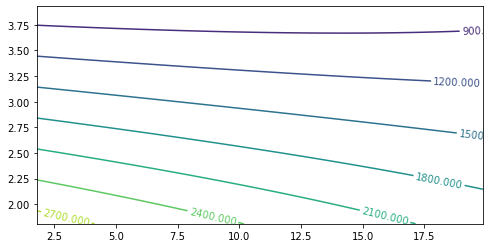

In [57]:
plt.figure(figsize=(8,4))
CS = plt.contour(TH0, TH1, Js)
plt.clabel(CS, inline=True, fontsize=10,inline_spacing=2)

In [58]:
from mpl_toolkits.mplot3d import Axes3D

ms = np.linspace(theta[0] - 15 , theta[0] + 15, 100)
bs = np.linspace(theta[1] - 15 , theta[1] + 15, 100)

M, B = np.meshgrid(ms, bs)

zs = np.array([ cost_function(y, hypothesis_function(X, theta))
    for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

<ipython-input-59-3b909e3cb67a>:5: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 10, color='b', alpha=0.5, offset=0, stride=30)


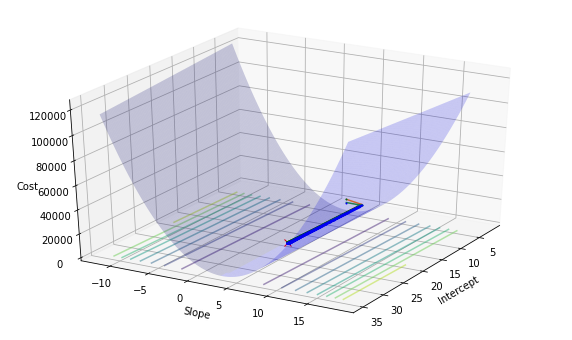

In [59]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 10, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost') 
ax.view_init(elev=30., azim=30)
ax.plot([theta[0]], [theta[1]], [cost_list[-1]] , markerfacecolor='r', markeredgecolor='r', marker='x', markersize=7);

ax.plot(theta_list[:,0], theta_list[:,1], cost_list, markerfacecolor='g', markeredgecolor='g', marker='o', 
                markersize=1);
ax.plot(theta_list[:,0], theta_list[:,1], 0 , markerfacecolor='b', markeredgecolor='b', marker='.', markersize=2);